In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [18]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [19]:
df.isna().mean() * 100 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [20]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [21]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [11]:
#water_port['ph'].mean()

7.080794504276819

In [12]:
#water_port['Sulfate'].mean()

333.7757766108134

In [26]:
knn_imputer = KNNImputer(n_neighbors=5)
array = knn_imputer.fit_transform(df)
df = pd.DataFrame(array, columns=df.columns)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,364.091541,392.449580,19.903225,64.327280,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,327.357588,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,325.952434,402.883113,11.168946,77.488213,4.708658,1.0


In [29]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.078167,196.369496,22014.092526,7.122277,333.605767,426.205111,14.284970,66.403218,3.966786,0.390110
std,1.497228,32.879761,8768.570828,1.583085,37.453055,80.824064,3.308162,15.837754,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.187017,176.850538,15666.690297,6.127421,312.389295,365.734414,12.065801,56.409254,3.439711,0.000000
50%,7.052221,196.967627,20927.833607,7.130299,333.255192,421.884968,14.218338,66.603114,3.955028,0.000000
75%,7.948570,216.667456,27332.762127,8.114887,355.013586,481.792304,16.557652,76.843337,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   float64
dtypes: float64(10)
memory usage: 256.1 KB


In [37]:
x = df.drop('Potability',axis=1)
y = df['Potability']

# Normalization

In [38]:
normal_scaler = MinMaxScaler()
array1 =normal_scaler.fit_transform(x)
x_new= pd.DataFrame(array1,columns=x.columns)
x_new

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.511204,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.588285,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.572249,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327
...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534
3272,0.557775,0.530016,0.279263,0.603473,0.667816,0.368912,0.678284,0.515887,0.254915
3273,0.672822,0.465486,0.539101,0.547807,0.563467,0.438152,0.338662,0.560655,0.349570
3274,0.366197,0.664407,0.191490,0.465860,0.559475,0.387157,0.343638,0.622659,0.616120


### data split

In [39]:
x_train , x_test, y_train, y_test = train_test_split(x_new,y,test_size= 0.2,random_state= 15, stratify=y) 

In [40]:
# Initiating KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
# training data evaluation

y_pred_train = knn_clf.predict(x_train)

In [42]:
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("cnf matrix:\n",cnf_matrix)

acc = accuracy_score(y_train,y_pred_train)
print("accuracy :\n", acc)

clf_report = classification_report(y_train,y_pred_train)
print("clf report :\n",clf_report)


cnf matrix:
 [[1413  185]
 [ 453  569]]
accuracy :
 0.7564885496183206
clf report :
               precision    recall  f1-score   support

         0.0       0.76      0.88      0.82      1598
         1.0       0.75      0.56      0.64      1022

    accuracy                           0.76      2620
   macro avg       0.76      0.72      0.73      2620
weighted avg       0.76      0.76      0.75      2620



In [43]:
# testing data evaluation

y_pred_test = knn_clf.predict(x_test)

In [44]:
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("cnf matrix:\n",cnf_matrix)

acc = accuracy_score(y_test,y_pred_test)
print("accuracy :\n", acc)

clf_report = classification_report(y_test,y_pred_test)
print("clf report :\n",clf_report)


cnf matrix:
 [[311  89]
 [153 103]]
accuracy :
 0.6310975609756098
clf report :
               precision    recall  f1-score   support

         0.0       0.67      0.78      0.72       400
         1.0       0.54      0.40      0.46       256

    accuracy                           0.63       656
   macro avg       0.60      0.59      0.59       656
weighted avg       0.62      0.63      0.62       656



## Hyperparameter tuning

In [45]:
knn_model = KNeighborsClassifier()

In [46]:
hyperpara = {'n_neighbors' : np.arange(3,20),
            'p': [1,2]} #to check parameters

In [47]:
# using Gridsearch_cv
gscv_knn_model = GridSearchCV(knn_model,hyperpara,cv=3)
gscv_knn_model.fit(x_train,y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=18, p=1)

In [48]:
new_knn_model = gscv_knn_model.best_estimator_
new_knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=18, p=1)

In [49]:
train_acc = new_knn_model.score(x_train,y_train)
print(train_acc)

0.6683206106870229


In [50]:
test_acc = new_knn_model.score(x_test,y_test)
test_acc

0.6295731707317073

### p = 1

In [57]:
training_acc = []
testing_acc = []

for k in range(3,25):
    knn_clf_model = KNeighborsClassifier(n_neighbors=k,p =1)
    knn_clf_model.fit(x_train,y_train)
    
    train_acc = knn_clf_model.score(x_train,y_train)
    training_acc.append(train_acc)
    
    test_acc = knn_clf_model.score(x_test,y_test)
    testing_acc.append(test_acc)

In [59]:
print(training_acc)
print(testing_acc)

[0.8076335877862595, 0.751145038167939, 0.7549618320610687, 0.7141221374045802, 0.7251908396946565, 0.7022900763358778, 0.7110687022900763, 0.6977099236641221, 0.7087786259541985, 0.6820610687022901, 0.6870229007633588, 0.6736641221374046, 0.6854961832061068, 0.6717557251908397, 0.6770992366412214, 0.6683206106870229, 0.6702290076335878, 0.6648854961832061, 0.6709923664122137, 0.6610687022900763, 0.6679389312977099, 0.6645038167938931]
[0.6280487804878049, 0.6524390243902439, 0.635670731707317, 0.663109756097561, 0.6478658536585366, 0.6509146341463414, 0.6463414634146342, 0.6570121951219512, 0.6448170731707317, 0.6509146341463414, 0.6478658536585366, 0.6509146341463414, 0.6295731707317073, 0.6371951219512195, 0.6326219512195121, 0.6295731707317073, 0.6326219512195121, 0.625, 0.6234756097560976, 0.6280487804878049, 0.625, 0.6295731707317073]


Text(0, 0.5, 'Accuracy')

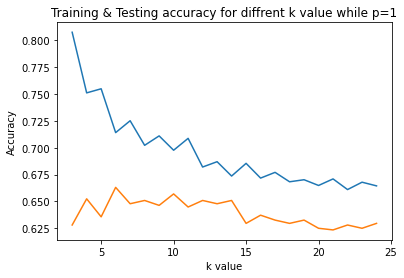

In [60]:
k = np.arange(3,25)
plt.plot(k,training_acc)
plt.plot(k,testing_acc)
plt.title('Training & Testing accuracy for diffrent k value while p=1')
plt.xlabel('k value')
plt.ylabel('Accuracy')

### p = 2

In [61]:
training_acc = []
testing_acc = []

for k in range(3,25):
    knn_clf_model = KNeighborsClassifier(n_neighbors=k,p =2)
    knn_clf_model.fit(x_train,y_train)
    
    train_acc = knn_clf_model.score(x_train,y_train)
    training_acc.append(train_acc)
    
    test_acc = knn_clf_model.score(x_test,y_test)
    testing_acc.append(test_acc)

In [62]:
print(training_acc)
print(testing_acc)

[0.8103053435114503, 0.7469465648854962, 0.7564885496183206, 0.7175572519083969, 0.7171755725190839, 0.6996183206106871, 0.7083969465648855, 0.6858778625954198, 0.6950381679389313, 0.6824427480916031, 0.6900763358778625, 0.6786259541984733, 0.683969465648855, 0.6778625954198473, 0.6816793893129771, 0.666793893129771, 0.6740458015267176, 0.6648854961832061, 0.6645038167938931, 0.6610687022900763, 0.666793893129771, 0.6637404580152672]
[0.6204268292682927, 0.6341463414634146, 0.6310975609756098, 0.6387195121951219, 0.649390243902439, 0.6539634146341463, 0.6585365853658537, 0.6463414634146342, 0.6448170731707317, 0.6402439024390244, 0.6417682926829268, 0.6554878048780488, 0.6524390243902439, 0.6478658536585366, 0.6615853658536586, 0.6600609756097561, 0.6615853658536586, 0.6539634146341463, 0.6585365853658537, 0.6570121951219512, 0.6707317073170732, 0.663109756097561]


Text(0, 0.5, 'Accuracy')

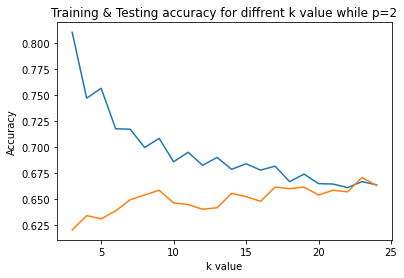

In [63]:
k = np.arange(3,25)
plt.plot(k,training_acc)
plt.plot(k,testing_acc)
plt.title('Training & Testing accuracy for diffrent k value while p=2')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [66]:
knn_new = KNeighborsClassifier(n_neighbors= 23,p=2)

In [67]:
knn_new.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [68]:
knn_new.score(x_train,y_train) # KNN new for train

0.666793893129771

In [69]:
knn_new.score(x_test,y_test) # KNN new for test

0.6707317073170732

# Standardization

In [70]:
standard_scaler = StandardScaler()
array2 = standard_scaler.fit_transform(x)
x_new_std= pd.DataFrame(array2,columns=x.columns)
x_new_std

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.052565,0.259195,-0.139471,0.112415,0.932261,1.708954,-1.180651,1.300115,-1.286298
1,-2.245883,-2.036414,-0.385987,-0.307694,0.066456,2.062575,0.270597,-0.636181,0.684218
2,0.682003,0.847665,-0.240047,1.360594,-0.084294,-0.094032,0.781117,0.001066,-1.167365
3,0.827388,0.547651,0.000493,0.592008,0.621683,-0.778830,1.255134,2.143210,0.848412
4,1.345396,-0.464429,-0.460249,-0.363698,-0.626748,-0.343939,-0.824357,-2.172687,0.138786
...,...,...,...,...,...,...,...,...,...
3271,-1.609930,-0.081758,2.916188,0.028027,0.703463,1.240155,-0.118075,0.017965,0.601124
3272,0.488103,-0.085667,-0.534295,0.593290,0.814097,-0.417706,1.698560,-0.131095,-1.497627
3273,1.564024,-0.626829,1.270810,0.144017,-0.166852,0.072263,-0.981329,0.217373,-0.856007
3274,-1.303543,1.041355,-1.144058,-0.517373,-0.204376,-0.288597,-0.942064,0.700016,0.950797


#### Train test split

In [71]:
x_train , x_test, y_train, y_test = train_test_split(x_new_std,y,test_size= 0.2,random_state= 15, stratify=y) 

In [72]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
# training data evaluation

y_pred_train = knn_clf.predict(x_train)

In [74]:
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("cnf matrix:\n",cnf_matrix)

acc = accuracy_score(y_train,y_pred_train)
print("accuracy :\n", acc)

clf_report = classification_report(y_train,y_pred_train)
print("clf report :\n",clf_report)


cnf matrix:
 [[1400  198]
 [ 445  577]]
accuracy :
 0.7545801526717557
clf report :
               precision    recall  f1-score   support

         0.0       0.76      0.88      0.81      1598
         1.0       0.74      0.56      0.64      1022

    accuracy                           0.75      2620
   macro avg       0.75      0.72      0.73      2620
weighted avg       0.75      0.75      0.75      2620



In [75]:
# testing data evaluation

y_pred_test = knn_clf.predict(x_test)

In [76]:
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("cnf matrix:\n",cnf_matrix)

acc = accuracy_score(y_test,y_pred_test)
print("accuracy :\n", acc)

clf_report = classification_report(y_test,y_pred_test)
print("clf report :\n",clf_report)


cnf matrix:
 [[314  86]
 [146 110]]
accuracy :
 0.6463414634146342
clf report :
               precision    recall  f1-score   support

         0.0       0.68      0.79      0.73       400
         1.0       0.56      0.43      0.49       256

    accuracy                           0.65       656
   macro avg       0.62      0.61      0.61       656
weighted avg       0.64      0.65      0.64       656



## Hyperparameter tuning

In [77]:
knn_model = KNeighborsClassifier()

In [78]:
hyperpara = {'n_neighbors' : np.arange(3,20),
            'p': [1,2]} #to check parameters

In [79]:
# using Gridsearch_cv
gscv_knn_model = GridSearchCV(knn_model,hyperpara,cv=3)
gscv_knn_model.fit(x_train,y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [80]:
new_knn_model = gscv_knn_model.best_estimator_
new_knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [81]:
train_acc = new_knn_model.score(x_train,y_train)
print(train_acc)

0.6973282442748091


In [82]:
test_acc = new_knn_model.score(x_test,y_test)
test_acc

0.6463414634146342

In [89]:
training_acc = []
testing_acc = []

for k in range(3,20):
    knn_clf_model = KNeighborsClassifier(n_neighbors=k,p =1)
    knn_clf_model.fit(x_train,y_train)
    
    train_acc = knn_clf_model.score(x_train,y_train)
    training_acc.append(train_acc)
    
    test_acc = knn_clf_model.score(x_test,y_test)
    testing_acc.append(test_acc)

In [90]:
print(training_acc)
print(testing_acc)

[0.8072519083969466, 0.7522900763358779, 0.7595419847328244, 0.7187022900763359, 0.7347328244274809, 0.7022900763358778, 0.7240458015267176, 0.7064885496183206, 0.716030534351145, 0.6984732824427481, 0.7045801526717558, 0.6885496183206107, 0.6877862595419847, 0.6774809160305344, 0.683206106870229, 0.6763358778625954, 0.683587786259542]
[0.6295731707317073, 0.6463414634146342, 0.6387195121951219, 0.6509146341463414, 0.663109756097561, 0.6600609756097561, 0.663109756097561, 0.6737804878048781, 0.6600609756097561, 0.6646341463414634, 0.6432926829268293, 0.6539634146341463, 0.6387195121951219, 0.649390243902439, 0.6509146341463414, 0.6326219512195121, 0.6417682926829268]


Text(0, 0.5, 'Accuracy')

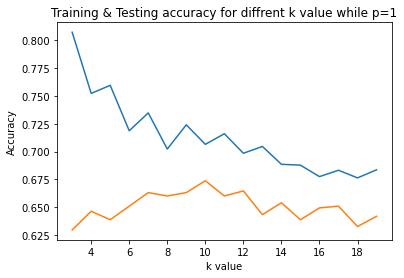

In [91]:
k = np.arange(3,20)
plt.plot(k,training_acc)
plt.plot(k,testing_acc)
plt.title('Training & Testing accuracy for diffrent k value while p=1')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [92]:
training_acc = []
testing_acc = []

for k in range(3,20):
    knn_clf_model = KNeighborsClassifier(n_neighbors=k,p =2)
    knn_clf_model.fit(x_train,y_train)
    
    train_acc = knn_clf_model.score(x_train,y_train)
    training_acc.append(train_acc)
    
    test_acc = knn_clf_model.score(x_test,y_test)
    testing_acc.append(test_acc)

In [93]:
print(training_acc)
print(testing_acc)

[0.816412213740458, 0.7538167938931297, 0.7545801526717557, 0.7198473282442748, 0.7198473282442748, 0.7019083969465649, 0.7099236641221374, 0.6938931297709924, 0.7022900763358778, 0.6923664122137405, 0.7045801526717558, 0.6919847328244275, 0.6973282442748091, 0.6809160305343511, 0.6946564885496184, 0.6732824427480916, 0.682824427480916]
[0.6067073170731707, 0.6539634146341463, 0.6463414634146342, 0.6585365853658537, 0.6448170731707317, 0.6600609756097561, 0.6814024390243902, 0.6646341463414634, 0.6692073170731707, 0.6722560975609756, 0.6585365853658537, 0.6554878048780488, 0.6463414634146342, 0.6539634146341463, 0.6570121951219512, 0.6509146341463414, 0.649390243902439]


Text(0, 0.5, 'Accuracy')

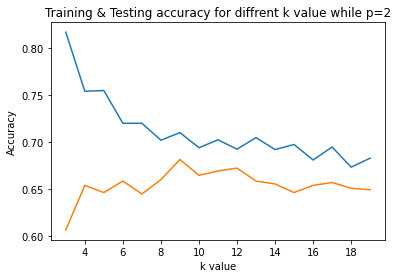

In [94]:
k = np.arange(3,20)
plt.plot(k,training_acc)
plt.plot(k,testing_acc)
plt.title('Training & Testing accuracy for diffrent k value while p=2')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [99]:
knn_new = KNeighborsClassifier(n_neighbors=9,p=2)

In [100]:
knn_new.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [101]:
knn_new.score(x_train,y_train) #train

0.7099236641221374

In [102]:
knn_new.score(x_test,y_test) #test

0.6814024390243902